In [38]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

sns.set_theme(style='ticks')

In [39]:
# Loading Data

dataset = load_dataset('lukebarousse/data_jobs') 
df = dataset['train'].to_pandas()

In [40]:
#cleaning the dataset
df['job_posted_date'] = pd.to_datetime(df['job_posted_date']) #convert to datetime
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x) #skills column is a strings of list. so converting to a list 

In [41]:
df_DA_USA = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()  #analysing only Data Analyst jobs in the  USA

In [42]:
df_DA_USA = df_DA_USA.dropna(subset= 'salary_year_avg')
df_DA_USA_exploded = df_DA_USA.explode('job_skills')
df_DA_USA_exploded[['salary_year_avg', 'job_skills']].head()

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [44]:
df_DA_skills = df_DA_USA_exploded['salary_year_avg'].groupby(df_DA_USA_exploded['job_skills']).agg(['median', 'count']).sort_values(by= 'count', ascending= False)
df_DA_skills = df_DA_skills.rename(columns= {'count': 'skill_count', 'median': 'median_salary'})
DA_job_count = len(df_DA_USA)  # Find count of Data Analyst jobs in US with salary info

df_DA_skills['skill_percent'] = df_DA_skills['skill_count'] / DA_job_count * 100
skill_percent = 5

df_DA_high_demand_skills = df_DA_skills[df_DA_skills['skill_percent'] > skill_percent]

df_DA_high_demand_skills

,median_salary,skill_count,skill_percent
job_skills,,,
sql,91000.00,2508,57.655172
excel,84392.00,1808,41.563218
python,97500.00,1431,32.896552
tableau,92875.00,1364,31.356322
sas,90000.00,926,21.287356
r,92500.00,893,20.528736
power bi,90000.00,838,19.264368
powerpoint,85000.00,462,10.620690
word,81194.75,461,10.597701


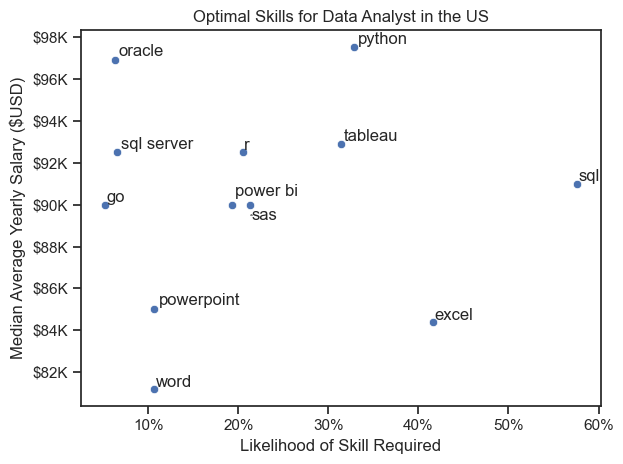

In [45]:

from adjustText import adjust_text #install adjustText
from matplotlib.ticker import PercentFormatter  #to format ticker to percentage

#df_DA_high_demand_skills.plot(kind= 'scatter', x= 'skill_count', y= 'median_salary')
sns.scatterplot(df_DA_high_demand_skills, x= 'skill_percent', y= 'median_salary')

texts= []

for i, txt in enumerate(df_DA_high_demand_skills.index):
    x, y = df_DA_high_demand_skills['skill_percent'].iloc[i], df_DA_high_demand_skills['median_salary'].iloc[i]

    # Manually adjusting the labels for power bi and sas as their percentages are overlapping on the chart
    if txt == "power bi":
        x -= 0.01  # Move it slightly to the right
        y += 500   # Move it slightly up
    elif txt == "sas":
        x -= 0.01  # Move it slightly to the left
        y -= 500   # Move it slightly down

    texts.append(plt.text(x, y, txt))
adjust_text(texts, arrowprops= dict(arrowstyle= "->", color= 'gray', lw=1))
ax= plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"${int(y/1000)}K"))
ax.xaxis.set_major_formatter(PercentFormatter(decimals= 0))

plt.xlabel('Likelihood of Skill Required')
plt.ylabel('Median Average Yearly Salary ($USD)')
plt.title('Optimal Skills for Data Analyst in the US')
plt.tight_layout()
#LINEWIDTH, linestyle, colormap, markers, markersize, figsize
plt.show()

COLORCODING BY SKILL TECHNOLOGY

In [50]:
df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

#technology_dict

In [54]:
df_technology = pd.DataFrame(list(technology_dict.items()), columns= ['technology', 'skills'])
df_technology = df_technology.explode('skills')
df_technology


,technology,skills
0,analyst_tools,sap
0,analyst_tools,tableau
0,analyst_tools,splunk
0,analyst_tools,sheets
0,analyst_tools,sharepoint
...,...,...
9,sync,google chat
9,sync,rocketchat
9,sync,twilio
9,sync,symphony


In [66]:
df_plot = df_DA_high_demand_skills.merge(df_technology, left_on= 'job_skills', right_on= 'skills')
df_plot = df_plot.set_index('skills')

In [67]:
df_plot.index

Index(['sql', 'excel', 'python', 'tableau', 'sas', 'sas', 'r', 'power bi',
       'powerpoint', 'word', 'sql server', 'oracle', 'go'],
      dtype='object', name='skills')

In [68]:
df_plot

,median_salary,skill_count,skill_percent,technology
skills,,,,
sql,91000.00,2508,57.655172,programming
excel,84392.00,1808,41.563218,analyst_tools
python,97500.00,1431,32.896552,programming
tableau,92875.00,1364,31.356322,analyst_tools
sas,90000.00,926,21.287356,analyst_tools
sas,90000.00,926,21.287356,programming
r,92500.00,893,20.528736,programming
power bi,90000.00,838,19.264368,analyst_tools
powerpoint,85000.00,462,10.620690,analyst_tools


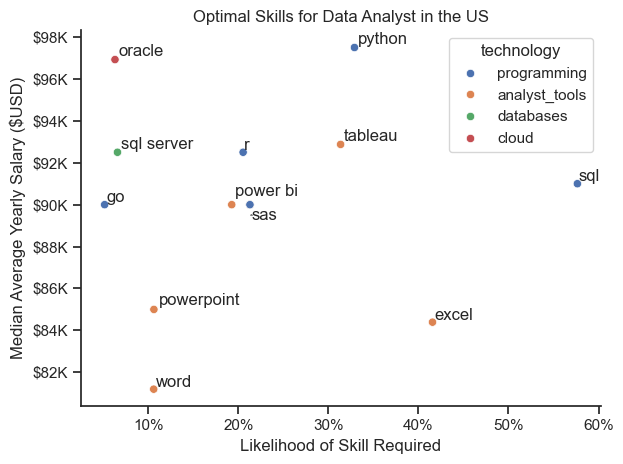

In [72]:

from adjustText import adjust_text #install adjustText
from matplotlib.ticker import PercentFormatter  #to format ticker to percentage

#df_DA_high_demand_skills.plot(kind= 'scatter', x= 'skill_count', y= 'median_salary')
sns.scatterplot(df_plot, x= 'skill_percent', y= 'median_salary', hue= 'technology')

texts= []

for i, txt in enumerate(df_DA_high_demand_skills.index):
    x, y = df_DA_high_demand_skills['skill_percent'].iloc[i], df_DA_high_demand_skills['median_salary'].iloc[i]

    # Manually adjusting the labels for power bi and sas as their percentages are overlapping on the chart
    if txt == "power bi":
        x -= 0.01  # Move it slightly to the right
        y += 500   # Move it slightly up
    elif txt == "sas":
        x -= 0.01  # Move it slightly to the left
        y -= 500   # Move it slightly down

    texts.append(plt.text(x, y, txt))
adjust_text(texts, arrowprops= dict(arrowstyle= "->", color= 'gray', lw=1))
ax= plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"${int(y/1000)}K"))
ax.xaxis.set_major_formatter(PercentFormatter(decimals= 0))

plt.xlabel('Likelihood of Skill Required')
plt.ylabel('Median Average Yearly Salary ($USD)')
plt.title('Optimal Skills for Data Analyst in the US')
plt.tight_layout()
sns.despine()
#LINEWIDTH, linestyle, colormap, markers, markersize, figsize
plt.show()